Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Categorizzazione dei testi tokenizzati utilizzando modelli di classificazione

- **1.** **<u>Stratified K-Fold + TFIDF + Support Vector Machine model:</u>**
    - **1.1** Utilizzando la text variable pre-processata;
    - **1.2** Utilizzando la text variable pre-processata & Lemmatized;


- **2.** **<u>Stratified K-Fold + TFIDF + Logisti Regression classifier model:</u>**
    - **2.1** Utilizzando la text variable pre-processata;
    - **2.2** Utilizzando la text variable pre-processata & Lemmatized;
    

- **3.** **<u>Stratified K-Fold + TFIDF + Naive Bayes Model & GridSearchCV:</u>**
    - **3.1** Attraverso l'utilizzo degli Hyperparameters con GridSearchCV e impiegando la text variable pre-processata;
    - **3.2** Attraverso l'utilizzo degli Hyperparameters con GridSearchCV e impiegando la text variable pre-processata & Lemmatized;
    

- **4.** **<u>Conclusioni.</u>**


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import math
import warnings
from matplotlib import cm
import string
import unicodedata
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
from tqdm import tqdm
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

**Importo file CSV**

In [3]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\11_Dataset_TFIDF_LR_&_SVM\\Dataset_TFIDF_LR_&_SVM.csv")

<hr style="border:1px solid black">

### 1 - Stratified K - Fold + TFIDF + Support Vector Machine model

**1.1** **Utilizzando la text variable pre-processata:**

In [4]:
# Imposto TFIDF parameter max feature pari a 49090 in quanto pari alnumero di parole presenti in "Descrizione_Bene_Pre_Process":
tfidf = TfidfVectorizer(max_features = 49090, ngram_range=(1,3), analyzer='word')

X = tfidf.fit_transform(df["Descrizione_Bene_Pre_Process"])
y = df["Destinazione_Uso_Encoded"]

folds = StratifiedKFold(n_splits=5)

score_precision = []
score_f1 = []
score_recall = []

all_test_indices = []
all_predictions = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    svm_predictions = clf.predict(X_test)
    
    precision = precision_score(y_test, svm_predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, svm_predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, svm_predictions, average='macro', zero_division=0)    

    score_precision.append(precision)
    score_recall.append(recall)
    score_f1.append(f1)
    
    all_test_indices.extend(test_index)
    all_predictions.extend(svm_predictions)

mean_precision = np.mean(score_precision)
mean_recall = np.mean(score_recall)
mean_f1 = np.mean(score_f1)    

classification_report_str = classification_report(y.iloc[all_test_indices], all_predictions, zero_division=1)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str, "\n")
print("Precision:", round(mean_precision, 2))
print("Recall:", round(mean_recall, 2))
print("F1-Score:", round(mean_f1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.11      0.02      0.03       550
           1       0.68      0.52      0.59       560
           2       0.55      0.32      0.40      2269
           3       0.79      0.66      0.72      5801
           4       0.89      0.93      0.91    132176
           5       0.68      0.59      0.63      7743
           6       0.43      0.37      0.40     16904

    accuracy                           0.83    166003
   macro avg       0.59      0.49      0.53    166003
weighted avg       0.82      0.83      0.83    166003
 

Precision: 0.61
Recall: 0.49
F1-Score: 0.53


- L'**F1 score** ottenuta con **SVM** sulla variabile testuale pre-processata ma non sottoposta a lemmatization è pari a **0.53**;
- Molto bassa l'F1 score relativa alla **categoria 0** (Agricultural Building) pari a **0.03**.

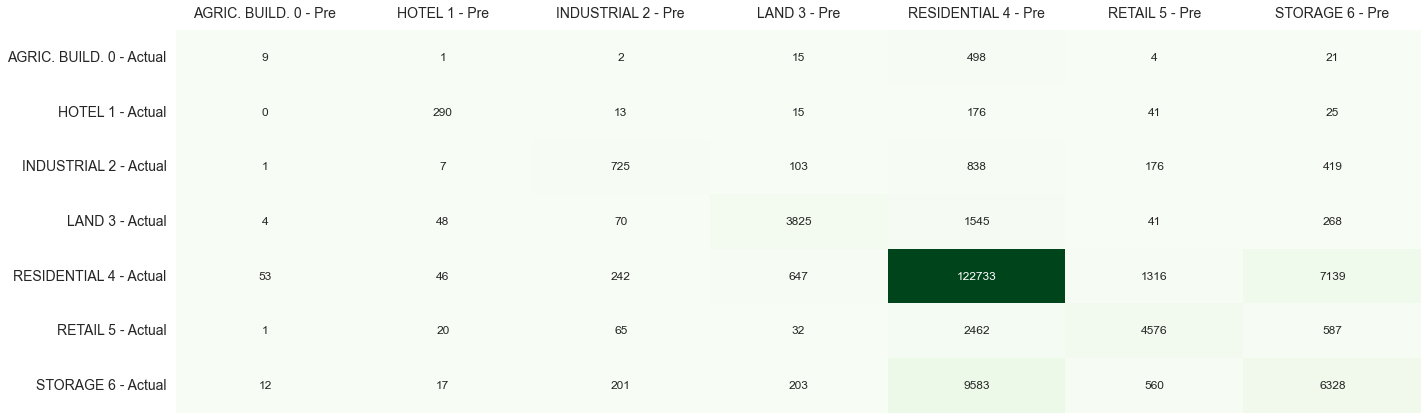

In [5]:
cm_pred = confusion_matrix(y.iloc[all_test_indices], all_predictions)
cm_pred = pd.DataFrame(cm_pred,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [6]:
print("Numero predizioni corrette: ", 9+290+725+3825+122733+4576+6328)
print("Numero predizioni sbagliate: ", 166003-(9+290+725+3825+122733+4576+6328))

Numero predizioni corrette:  138486
Numero predizioni sbagliate:  27517


- In generale si denota un **distribuzione degli errori più accentuata sulle classi inerenti ai beni**:
    - 0 (**Agricultural Building**);
    - 2 (**Industrial**);
    - 6 (**Storage**);


- Mentre i **parametri migliori** sono stati raggiunti nelle **categorie dei beni appartenenti** a:
    - 3 (**Land**);
    - 4 (**Residential**);
    - 5 (**Retail**);

**1.2 Utilizzando la text variable pre-processata & Lemmatized**

In [7]:
# Imposto TFIDF parameter max feature pari a 50518 in quanto pari al
# numero di parole presenti nel campo "Descrizione_Bene_Lemm_Spacy":
tfidf_1 = TfidfVectorizer(max_features = 50518, ngram_range=(1,3), analyzer='word')

X_1 = tfidf_1.fit_transform(df["Descrizione_Bene_Lemm_Spacy"])
y_1 = df["Destinazione_Uso_Encoded"]

folds_1 = StratifiedKFold(n_splits=5)

score_precision_1 = []
score_recall_1 = []
score_f1_1 = []

all_test_indices_1 = []
all_predictions_1 = []

for train_index, test_index in folds_1.split(X_1, y_1):
    X_train_1, X_test_1, y_train_1, y_test_1 = X_1[train_index], X_1[test_index], y_1[train_index], y_1[test_index]
    
    clf_1 = LinearSVC()
    clf_1.fit(X_train_1, y_train_1)
    svm_predictions_1 = clf_1.predict(X_test_1)
    
    precision_1 = precision_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)
    recall_1 = recall_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)
    f1_1 = f1_score(y_test_1, svm_predictions_1, average='macro', zero_division=0)    

    score_precision_1.append(precision)
    score_recall_1.append(recall)
    score_f1_1.append(f1)
    
    all_test_indices_1.extend(test_index)
    all_predictions_1.extend(svm_predictions_1)

mean_precision_1 = np.mean(score_precision_1)
mean_recall_1 = np.mean(score_recall_1)
mean_f1_1 = np.mean(score_f1_1)    

classification_report_str_1 = classification_report(y_1.iloc[all_test_indices], all_predictions_1, zero_division=1)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_1, "\n")
print("Precision:", round(mean_precision_1, 2))
print("Recall:", round(mean_recall_1, 2))
print("F1-Score:", round(mean_f1_1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.11      0.01      0.03       550
           1       0.65      0.51      0.58       560
           2       0.54      0.31      0.39      2269
           3       0.80      0.66      0.73      5801
           4       0.89      0.93      0.91    132176
           5       0.69      0.59      0.64      7743
           6       0.44      0.38      0.41     16904

    accuracy                           0.84    166003
   macro avg       0.59      0.49      0.52    166003
weighted avg       0.82      0.84      0.83    166003
 

Precision: 0.64
Recall: 0.51
F1-Score: 0.56


- L'**F1 score è aumentato di 3 punti percentuali**, ora **0.56** rispetto al modello precedente che vedeva l'utilizzo della variabile testuale senza processo di **lemmatization**, sempre utilizzando **SVM**.
- **Rimane comunque bassa** la percentuale relativa alla **F1 Score** per la categoria 0 (**Agricultural Building**).

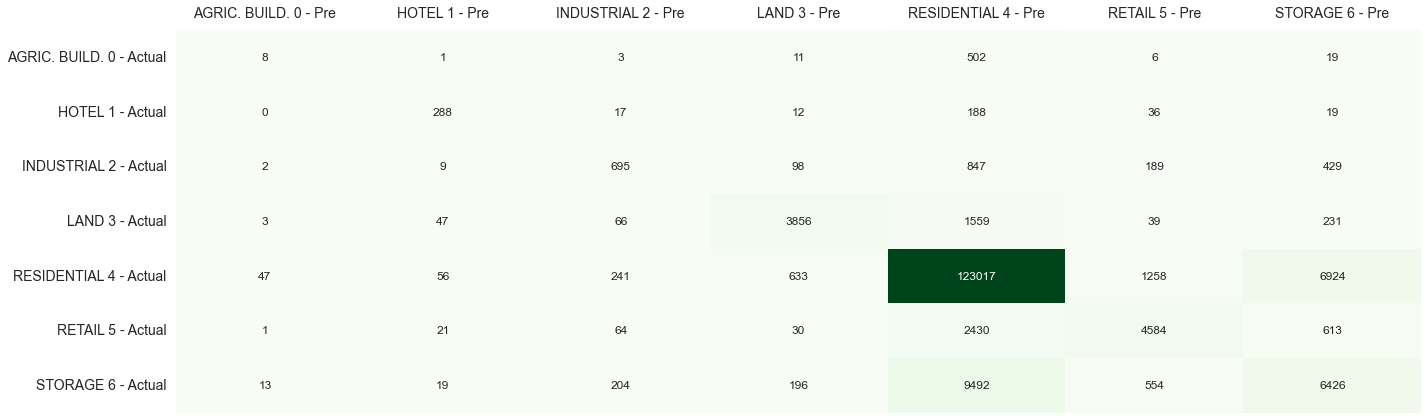

In [8]:
cm_pred_1 = confusion_matrix(y_1.iloc[all_test_indices], all_predictions_1)
cm_pred_1 = pd.DataFrame(cm_pred_1,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap_1 = sns.heatmap(cm_pred_1, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap_1.set_xticklabels(heatmap_1.get_xticklabels(), fontsize=14)
heatmap_1.set_yticklabels(heatmap_1.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [9]:
print("Numero predizioni corrette: ", 8+288+695+3856+123017+4584+6426)
print("Numero predizioni sbagliate: ", 166003-(8+288+695+3856+123017+4584+6426))

Numero predizioni corrette:  138874
Numero predizioni sbagliate:  27129


- **Utilizzando la variabile testuale lemmatizzata**, si ottiene una **diminuzione delle values corrette per le prime tre classi**. Anche se leggera, si vede una minima diminuzione per i beni:
    - 0 (**Agricultural Building**);
    - 1 (**Hotel**);
    - 2 (**Industrial**).


- Mentre sono **aumentate le values corrette per le ultime tre classi**. Anche in questo caso si denota un aumento minimo ma comunque presente, per le classi seguenti:
    - 3 (**Land**);
    - 5 (**Retail**);
    - 6 (**Storage**);
    

- Gli **errori sono complessivamente diminuiti** passando da **27.517** a **27.129**.

<hr style="border:1px solid black">

### 2 - Stratified K - Fold + TFIDF + Logistic Regression model

**2.1** **Utilizzando la text variable pre-processata:**

In [10]:
tfidf_2 = TfidfVectorizer(max_features = 49090, ngram_range=(1,3), analyzer='word')

X_2 = tfidf_2.fit_transform(df["Descrizione_Bene_Pre_Process"])
y_2 = df["Destinazione_Uso_Encoded"]

folds_2 = StratifiedKFold(n_splits=5)

score_precision_2 = []
score_f1_2 = []
score_recall_2 = []

all_test_indices_2 = []
all_predictions_2 = []

for train_index_2, test_index_2 in folds_2.split(X_2, y_2):
    X_train_2, X_test_2, y_train_2, y_test_2 = X_2[train_index_2], X_2[test_index_2], y_2[train_index_2], y_2[test_index_2]

    logistic_model_2 = LogisticRegression(multi_class='ovr', C=0.1, max_iter=1000)
    logistic_model_2.fit(X_train_2, y_train_2)
    lr_predictions_2 = logistic_model_2.predict(X_test_2)
    
    precision_2 = precision_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)
    recall_2 = recall_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)
    f1_2 = f1_score(y_test_2, lr_predictions_2, average='macro', zero_division=0)    

    score_precision_2.append(precision_2)
    score_recall_2.append(recall_2)
    score_f1_2.append(f1_2)
    
    all_test_indices_2.extend(test_index_2)
    all_predictions_2.extend(lr_predictions_2)

mean_precision_2 = np.mean(score_precision_2)
mean_recall_2 = np.mean(score_recall_2)
mean_f1_2 = np.mean(score_f1_2)    

classification_report_str_2 = classification_report(y_2.iloc[all_test_indices_2], all_predictions_2, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_2, "\n")
print("Precision:", round(mean_precision_2, 2))
print("Recall:", round(mean_recall_2, 2))
print("F1-Score:", round(mean_f1_2, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       550
           1       0.00      0.00      0.00       560
           2       0.61      0.03      0.06      2269
           3       0.86      0.46      0.60      5801
           4       0.85      0.99      0.91    132176
           5       0.79      0.39      0.53      7743
           6       0.71      0.24      0.36     16904

    accuracy                           0.84    166003
   macro avg       0.55      0.30      0.35    166003
weighted avg       0.83      0.84      0.81    166003
 

Precision: 0.55
Recall: 0.3
F1-Score: 0.35


- In questo caso invece riscontriamo l'**F1 score più bassa** vista fino ad ora, ovvero pari a **0.35**. Uno score molto più basso rispetto a quello registrato con il modello SVM.

- Addirittura le **classi con 0 punti percentuali per l'F1 score sono due**, 0 (**Agricultural Building**) & 1 (**Hotel**). **Abbassata notevolmente anche la classe** inerente ad i beni 2 (**Industrial**).

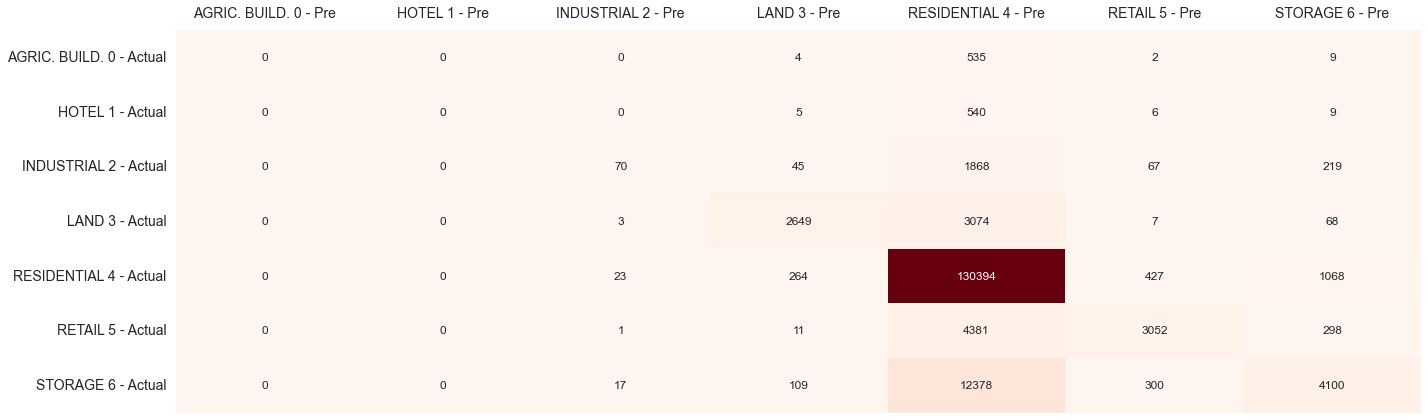

In [11]:
cm_pred_2 = confusion_matrix(y_2.iloc[all_test_indices_2], all_predictions_2)
cm_pred_2 = pd.DataFrame(cm_pred_2,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_2, 
            annot=True, 
            cmap="Reds", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [12]:
print("Numero predizioni corrette: ", 0+0+70+2649+130394+3052+4100)
print("Numero predizioni sbagliate: ", 166003-(0+0+70+2649+130394+3052+4100))

Numero predizioni corrette:  140265
Numero predizioni sbagliate:  25738


- Tuttavia il **numero complessivo di errori è diminuito** a discapito però delle altre classi che mostrano una notevole di minuzione distribuita su tutti gli altri tipi di bene. Da notare inoltre che i beni **Agricultural building** e **Hotel** hanno ora **0 values corrette**.

- Anche la **classe** 6 (**Storage**) ha drasticamente **diminuito i valori predetti correttamente**.

**2.2 Utilizzando la text variable pre-processata & Lemmatized**

In [13]:
tfidf_3 = TfidfVectorizer(max_features = 50518, ngram_range=(1,3), analyzer='word')

X_3 = tfidf_3.fit_transform(df["Descrizione_Bene_Lemm_Spacy"])
y_3 = df["Destinazione_Uso_Encoded"]

folds_3 = StratifiedKFold(n_splits=5)

score_precision_3 = []
score_f1_3 = []
score_recall_3 = []

all_test_indices_3 = []
all_predictions_3 = []

for train_index_3, test_index_3 in folds_3.split(X_3, y_3):
    X_train_3, X_test_3, y_train_3, y_test_3 = X_3[train_index_3], X_3[test_index_3], y_3[train_index_3], y_3[test_index_3]

    logistic_model_3 = LogisticRegression(multi_class='ovr', C=0.1, max_iter=1000)
    logistic_model_3.fit(X_train_3, y_train_3)
    lr_predictions_3 = logistic_model_3.predict(X_test_3)
    
    precision_3 = precision_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)
    recall_3 = recall_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)
    f1_3 = f1_score(y_test_3, lr_predictions_3, average='macro', zero_division=0)    

    score_precision_3.append(precision_3)
    score_recall_3.append(recall_3)
    score_f1_3.append(f1_3)
    
    all_test_indices_3.extend(test_index_3)
    all_predictions_3.extend(lr_predictions_3)

mean_precision_3 = np.mean(score_precision_3)
mean_recall_3 = np.mean(score_recall_3)
mean_f1_3 = np.mean(score_f1_3)    

classification_report_str_3 = classification_report(y_3.iloc[all_test_indices_3], all_predictions_3, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_3, "\n")
print("Precision:", round(mean_precision_3, 2))
print("Recall:", round(mean_recall_3, 2))
print("F1-Score:", round(mean_f1_3, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       550
           1       0.00      0.00      0.00       560
           2       0.64      0.03      0.06      2269
           3       0.85      0.48      0.61      5801
           4       0.85      0.99      0.91    132176
           5       0.79      0.39      0.52      7743
           6       0.71      0.24      0.36     16904

    accuracy                           0.84    166003
   macro avg       0.55      0.30      0.35    166003
weighted avg       0.83      0.84      0.81    166003
 

Precision: 0.55
Recall: 0.3
F1-Score: 0.35


- Anche in questo caso l'**F1 score** è **identica a quella sopra**, quindi **non portando ad alcuna miglioria l'utilizzo di una colonna testuale lemmatizzata**, insieme all'utilizzo del modello **logistic regression**, in quanto è di nuovo pari a 0.35.

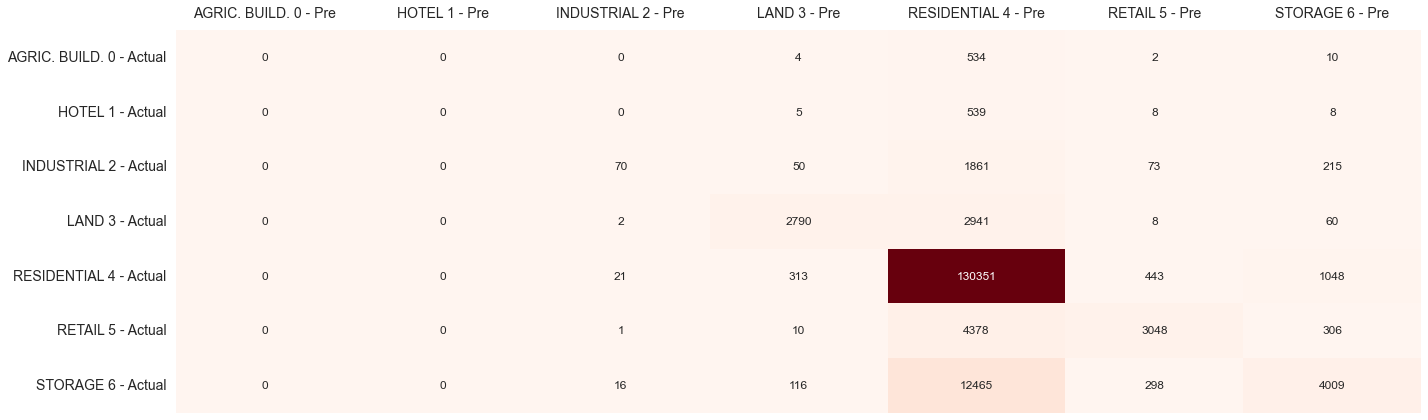

In [14]:
cm_pred_3 = confusion_matrix(y_3.iloc[all_test_indices_3], all_predictions_3)
cm_pred_3 = pd.DataFrame(cm_pred_3,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_3, 
            annot=True, 
            cmap="Reds", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [15]:
print("Numero predizioni corrette: ", 0+0+70+2790+130351+3048+4009)
print("Numero predizioni sbagliate: ", 166003-(0+0+70+2790+130351+3048+4009))

Numero predizioni corrette:  140268
Numero predizioni sbagliate:  25735


- Di nuovo anche in questo caso ci sono **classi che hanno ottenuto valori corretti uguali a zero** come i beni:
    - 0 (**Agricultural Building**);
    - 1 (**Hotel**);

- Ci sono determinate classi che non hanno ottenuto 0 come valori corretti ma tuttavia hanno visto quasi **dimezzarsi relativo numero di valori corretti rispetto** a quanto emerso con **SVM**. Per esempio i seguenti beni:
    - (**Retail**);
    - (**Storage**);
    
- Anche in questo caso il **numero complessivo di errori** è diminuiti leggermente, passando da **25.738** a **25.735**.

<hr style="border:1px solid black">

### 3 - Stratified K - Fold + TFIDF + Naive Bayes Multinomial Classifier Model

**3.1** **Trovo gli hyperparametri e utilizzo la text variable pre-processata:**

In [16]:
tfidf_4 = TfidfVectorizer(max_features=49090, ngram_range=(1, 3), analyzer='word')
X_4 = tfidf_4.fit_transform(df["Descrizione_Bene_Pre_Process"])
y_4 = df["Destinazione_Uso_Encoded"]
folds_4 = StratifiedKFold(n_splits=5)

param_grid = {'alpha': [0.0, 0.01, 0.1, 0.5, 1.0], 'fit_prior': [True, False], 'force_alpha': [True, False]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=folds_4, scoring='f1', n_jobs=-1)
grid_search.fit(X_4, y_4)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}


- **Applico gli hyperparameters trovati**

In [17]:
score_precision_4 = []
score_f1_4 = []
score_recall_4 = []

all_test_indices_4 = []
all_predictions_4 = []

for train_index_4, test_index_4 in folds_4.split(X_4, y_4):
    X_train_4, X_test_4, y_train_4, y_test_4 = X_4[train_index_4], X_4[test_index_4], y_4[train_index_4], y_4[test_index_4]
    
    nbc_model_4 = MultinomialNB(alpha = 0.0, fit_prior = True, force_alpha = True)
    nbc_model_4.fit(X_train_4, y_train_4)
    nbc_predictions_4 = nbc_model_4.predict(X_test_4)

    precision_4 = precision_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)
    recall_4 = recall_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)
    f1_4 = f1_score(y_test_4, nbc_predictions_4, average='macro', zero_division=0)

    score_precision_4.append(precision_4)
    score_recall_4.append(recall_4)
    score_f1_4.append(f1_4)

    all_test_indices_4.extend(test_index_4)
    all_predictions_4.extend(nbc_predictions_4)

mean_precision_4 = np.mean(score_precision_4)
mean_recall_4 = np.mean(score_recall_4)
mean_f1_4 = np.mean(score_f1_4)

classification_report_str_4 = classification_report(y_4.iloc[all_test_indices_4], all_predictions_4, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_4, "\n")
print("Precision:", round(mean_precision_4, 2))
print("Recall:", round(mean_recall_4, 2))
print("F1-Score:", round(mean_f1_4, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.05      0.00       550
           1       0.34      0.08      0.13       560
           2       0.23      0.09      0.13      2269
           3       0.74      0.31      0.44      5801
           4       0.86      0.75      0.80    132176
           5       0.57      0.31      0.40      7743
           6       0.38      0.25      0.30     16904

    accuracy                           0.65    166003
   macro avg       0.45      0.26      0.31    166003
weighted avg       0.78      0.65      0.70    166003
 

Precision: 0.46
Recall: 0.26
F1-Score: 0.31


- Con l'utilizzo degli **hyperparameters** e il modello **Naive Bayes** si raggiunge una **F1 Score pari a 0.31**.
- La classe dei beni corrispondenti a 1 (**Hotel**) sono migliorati in termini di predizioni corrette.
- Tutte le altre classi non mostrano notevoli migliorie, anzi **si denota una diminuzione diffusa della F1 Score**.

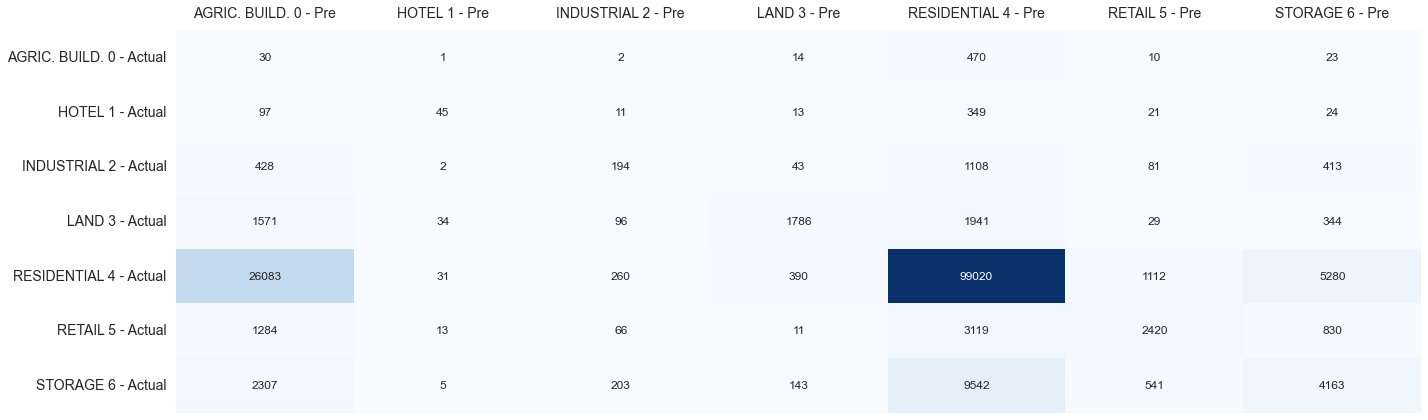

In [18]:
cm_pred_4 = confusion_matrix(y_4.iloc[all_test_indices_4], all_predictions_4)
cm_pred_4 = pd.DataFrame(cm_pred_4,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_4, 
            annot=True, 
            cmap="Blues", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [19]:
print("Numero predizioni corrette: ", 30+45+194+1786+99020+2420+4163)
print("Numero predizioni sbagliate: ", 166003-(30+45+194+1786+99020+2420+4163))

Numero predizioni corrette:  107658
Numero predizioni sbagliate:  58345


- Anche il **numero complessivo di errori è aumentato enormemente**, ora pari a **58.345**.

**3.2** **Trovo gli hyperparametri e utilizzo la text variable pre-processata & Lemmatizzata:**

In [20]:
tfidf_5 = TfidfVectorizer(max_features= 50518, ngram_range= (1, 3), analyzer= 'word')
X_5 = tfidf_5.fit_transform(df["Descrizione_Bene_Lemm_Spacy"])
y_5 = df["Destinazione_Uso_Encoded"]
folds_5 = StratifiedKFold(n_splits=5)

param_grid_1 = {'alpha': [0.0, 0.01, 0.1, 0.5, 1.0], 'fit_prior': [True, False], 'force_alpha': [True, False]}
grid_search_1 = GridSearchCV(MultinomialNB(), param_grid_1, cv=folds_5, scoring='f1', n_jobs=-1)
grid_search_1.fit(X_5, y_5)
best_params_1 = grid_search_1.best_params_
best_estimator_1 = grid_search_1.best_estimator_

print("Best Hyperparameters:", best_params_1)

Best Hyperparameters: {'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}


- **Applico gli hyperparameters:**

In [21]:
score_precision_5 = []
score_f1_5 = []
score_recall_5 = []

all_test_indices_5 = []
all_predictions_5 = []

for train_index_5, test_index_5 in folds_5.split(X_5, y_5):
    X_train_5, X_test_5, y_train_5, y_test_5 = X_5[train_index_5], X_5[test_index_5], y_5[train_index_5], y_5[test_index_5]

    nbc_model_5 = MultinomialNB(alpha = 0.0, fit_prior = True, force_alpha = True)
    nbc_model_5.fit(X_train_5, y_train_5)
    nbc_predictions_5 = nbc_model_5.predict(X_test_5)

    precision_5 = precision_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)
    recall_5 = recall_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)
    f1_5 = f1_score(y_test_5, nbc_predictions_5, average='macro', zero_division=0)

    score_precision_5.append(precision_5)
    score_recall_5.append(recall_5)
    score_f1_5.append(f1_5)

    all_test_indices_5.extend(test_index_5)
    all_predictions_5.extend(nbc_predictions_5)

mean_precision_5 = np.mean(score_precision_5)
mean_recall_5 = np.mean(score_recall_5)
mean_f1_5 = np.mean(score_f1_5)

classification_report_str_5 = classification_report(y_5.iloc[all_test_indices_5], all_predictions_5, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str_5, "\n")
print("Precision:", round(mean_precision_5, 2))
print("Recall:", round(mean_recall_5, 2))
print("F1-Score:", round(mean_f1_5, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.05      0.00       550
           1       0.30      0.07      0.11       560
           2       0.23      0.08      0.12      2269
           3       0.77      0.31      0.45      5801
           4       0.86      0.76      0.80    132176
           5       0.58      0.31      0.40      7743
           6       0.38      0.24      0.30     16904

    accuracy                           0.65    166003
   macro avg       0.45      0.26      0.31    166003
weighted avg       0.78      0.65      0.71    166003
 

Precision: 0.46
Recall: 0.26
F1-Score: 0.31


- Anche utilizzando la **variabile testuale lemmatizzata** l'**F1 Score rimane tuttavia invariata**, così come le altre metriche di valutazione, rimanendo pari a **0.31**.

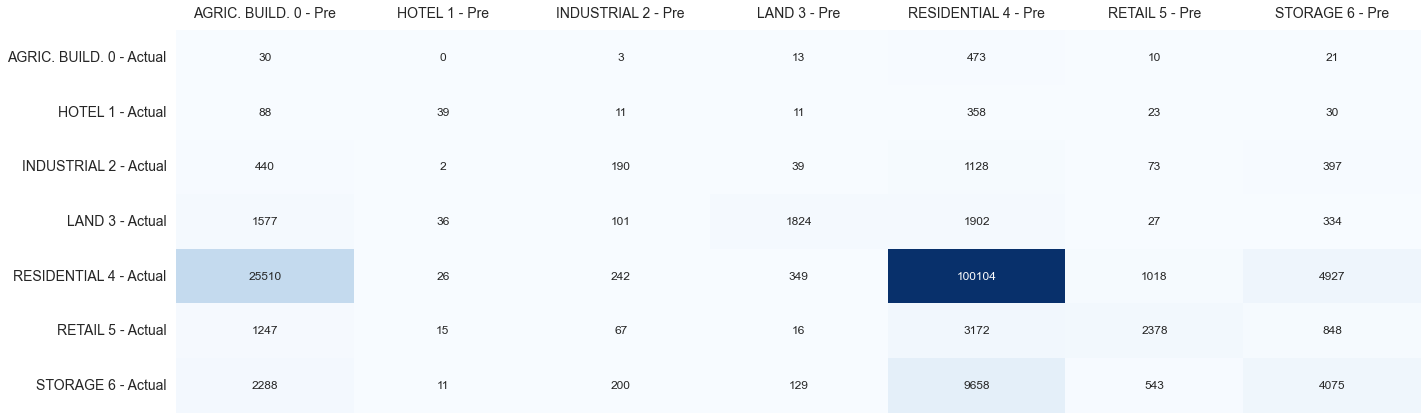

In [22]:
cm_pred_5 = confusion_matrix(y_5.iloc[all_test_indices_5], all_predictions_5)
cm_pred_5 = pd.DataFrame(cm_pred_5,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred_5, 
            annot=True, 
            cmap="Blues", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [23]:
print("Numero predizioni corrette: ", 30+39+190+1824+100104+2378+4075)
print("Numero predizioni sbagliate: ", 166003-(30+39+190+1824+100104+2378+4075))

Numero predizioni corrette:  108640
Numero predizioni sbagliate:  57363


- Il **numero di errori complessivi** è leggermente **diminuito rispetto a quanto emerso dalla predizione fatta sulla variabile non lemmatizzata**. In particolare essi sono passati da **58.345** a **57.363**.
- Le **migliorie principali** adottando **Naive Bayes** come modello predittivo sono emerse dai beni con categoria 6 (**Storage**), anche se hanno ancora circa **2/3 dei valori predetti in maniera errata**.

<hr style="border:1px solid black">

### 4 - Conclusioni

- **1.1 - Stratified K - Fold + TFIDF + Support Vector Machine model con testo pre-processato:**
    - F1-Score: **0.53**
    -  Numero predizioni corrette:  **138.486**
    -  Numero predizioni sbagliate:  **27.517**
    

- **1.2 - <u>Stratified K - Fold + TFIDF + Support Vector Machine model con testo pre-processato & Lemmatizzato:</u>**
    - <u>F1-Score: **0.56</u>**
    - Accuracy: **0.84**
    - Numero predizioni corrette:  **138.874**
    - Numero predizioni sbagliate:  **27.129**
    
    
- **2.1 - Stratified K - Fold + TFIDF + Logistic Regression con testo pre-processato:**
    - F1-Score: **0.35**
    - Numero predizioni corrette:  **140.265**
    - Numero predizioni sbagliate:  **25.738**


- **2.2 - Stratified K - Fold + TFIDF + Logistic Regression con testo pre-processato & Lemmatizzato:**
     - F1-Score: **0.35**
     - Numero predizioni corrette:  **140.268**
     - Numero predizioni sbagliate:  **25.735**


- **3.1 - Stratified K - Fold + TFIDF + Naive Bayes Model & GridSearchCV con testo pre-processato:**
    - Best Hyperparameters: *{'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}*
    -  F1-Score: **0.31**
    -  Numero predizioni corrette:  **107.658**
    -  Numero predizioni sbagliate:  **58.345**


- **3.2 - Stratified K - Fold + TFIDF + Naive Bayes Model & GridSearchCV con testo pre-processato & Lemmatizzato:**
    - Best Hyperparameters: *{'alpha': 0.0, 'fit_prior': True, 'force_alpha': True}*
    - F1-Score: **0.31**
    - Numero predizioni corrette:  **108.640**
    - Numero predizioni sbagliate:  **57.363**
      
<hr style="border:1px solid black">


#### In conclusione
    
- L'utilizzo di una **variabile testuale Pre-Processata e Lemmatizatta**, restituisce metriche di valutazione leggermente più alte rispetto a quelle relative all'utilizzo di una variabile testuale solo Pre-Processata. Soprattutto per quanto concerne l'utilizzo del modelo **SVM**; 
- L'**F1 score più alta** viene raggiunta dal modello **SVM utilizzato con la variabile lemmatizzata**, pari a **0.56**;
- Il **numero minore di errori complessivi** è ottenuto con il modello **Logistic Regression** ed è pari a **25.735**. Tuttavia, il **medesimo modello** restituisce la **seconda peggior F1 Score** registrata, pari a **0.35**;


- Il **tokenizer TFIDF** è stato impiegato utilizzando i seguenti parametri:
    - **max_features= 50518**, ovvero il numero di stringhe univoche presenti all'interno della variabile testuale pulita, pre-processata e lemmatizzata.;
    - **ngram_range= (1, 3)**, ovvero che per l'analisi della frequenza il modello tiene conto sia degli n-grams, che dei bigrams, così come dei trigrams, che abbiamo visto essere importanti durante la EDA della variabile testuale;
    - **analyzer= 'word'**, ovvero che per la tokenizzazione tiene conto delle parole e non dei caratteri;
    

- In **conclusione** quindi il modello che performa meglio è il seguente:
    - **<u>1.2 - Stratified K - Fold + TFIDF + Support Vector Machine model con testo pre-processato & Lemmatizzato.</u>**